In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load the Dataset

In [27]:
try:
    df = pd.read_csv('diabetes.csv')
    print("Database loaded successfully.")
    print("Original shape of the dataset: ", df.shape)
    print("\n First 5 rows ")
    print(df.head())
except FileExistsError:
    print("Error: Dataset not found.")
    exit()

Database loaded successfully.
Original shape of the dataset:  (768, 9)

 First 5 rows 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Handling missing values 

In this specific dataset, columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI cannot be 0. These are considered missing values.

In [28]:
cols_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [29]:
df[cols_with_missing_values] = df[cols_with_missing_values].replace(0,np.nan)

In [30]:
print(df[cols_with_missing_values])

     Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148.0           72.0           35.0      NaN  33.6
1       85.0           66.0           29.0      NaN  26.6
2      183.0           64.0            NaN      NaN  23.3
3       89.0           66.0           23.0     94.0  28.1
4      137.0           40.0           35.0    168.0  43.1
..       ...            ...            ...      ...   ...
763    101.0           76.0           48.0    180.0  32.9
764    122.0           70.0           27.0      NaN  36.8
765    121.0           72.0           23.0    112.0  26.2
766    126.0           60.0            NaN      NaN  30.1
767     93.0           70.0           31.0      NaN  30.4

[768 rows x 5 columns]


In [31]:
print("\nNumber of missing values (NaNs) after replacing zeros:")
print(df.isnull().sum())
print(df.head(20))


Number of missing values (NaNs) after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0            NaN      NaN  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0            NaN            NaN     

 Now, we'll fill the missing (NaN) values. Using the median is a good strategy because it's less sensitive to outliers than the mean.

In [32]:
imputer = SimpleImputer(strategy="median")

In [33]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [34]:
print("\nDataset after imputing missing values with the median:")
print(df_imputed.head())
print("\nConfirming no more missing dfvalues:")
print(df_imputed.isnull().sum())


Dataset after imputing missing values with the median:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    125.0  33.6   
1          1.0     85.0           66.0           29.0    125.0  26.6   
2          8.0    183.0           64.0           29.0    125.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  

Confirming no more missing dfvalues:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunctio

### Separate the target variable  

In [35]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

In [36]:
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (768, 8)
Shape of target (y): (768,)


### Split Data into Training and Testing Sets 

In [37]:
X_train, X_test , y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=42, stratify=y
)

In [38]:
print("\nData split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split into training and testing sets:
X_train shape: (537, 8)
X_test shape: (231, 8)


### Feature Scaling 

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#return a numpy array

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [42]:
print("\nFeatures have been scaled.")
print("First 5 rows of the scaled training data:")
print(X_train_scaled.head())


Features have been scaled.
First 5 rows of the scaled training data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.931383  2.086491       0.966939       0.498532 -0.163932  0.428910   
1     0.632606 -1.221912       0.474140       0.013767 -0.163932 -0.210550   
2    -0.562502 -0.520129      -0.675726       0.740915 -0.239259 -0.314648   
3    -0.562502 -0.720639      -1.497058      -0.107425 -0.415020  0.770947   
4     0.333829 -0.586966       0.145607       0.013767 -0.163932 -0.567458   

   DiabetesPedigreeFunction       Age  
0                 -0.374779  0.632129  
1                 -0.294168  0.716992  
2                  2.745172  0.038086  
3                  0.052162 -0.810548  
4                 -0.977870  1.226172  


Preprocessing Complete

In [43]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

In [ ]:
print("\nInitializing Models: Logistic Regression, Random Forest, SVM ")


--- Initializing Models: Logistic Regression, Random Forest, SVM ---


Train and Evaluate Individual Models

In [ ]:
print("\nTraining and Evaluating Individual Model")
for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"Accuracy for {clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}")



--- Training and Evaluating Individual Models ---
Accuracy for LogisticRegression: 0.7446
Accuracy for RandomForestClassifier: 0.7359
Accuracy for SVC: 0.7403


### Ensemble Technique Voting (Soft Voting)

In [47]:
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf), ('rf',rnd_clf), ('svc',svm_clf)],
    voting='soft'
)

training ensemble model

In [ ]:
print("\nTraining the Ensemble Model (Voting Classifier)")
voting_clf.fit(X_train_scaled, y_train)
print("Training Complete")


Training the Ensemble Model (Voting Classifier)
Training Complete


evaluating ensemble model

In [49]:
y_pred_ensemble = voting_clf.predict(X_test_scaled)

In [50]:
print("\nEnsemble Model Evaluation")
accuracy = accuracy_score(y_test,y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


Ensemble Model Evaluation
Ensemble Model Accuracy: 0.7359


In [51]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231




Confusion Matrix:
[[127  23]
 [ 38  43]]


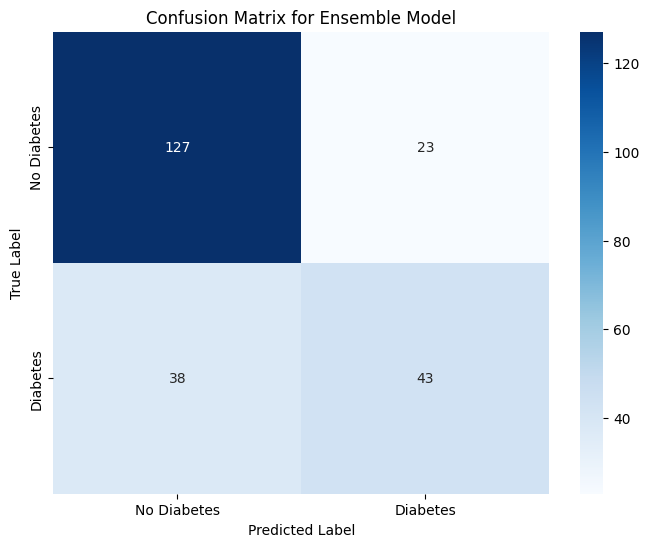

In [52]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)

# Visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

### Determine Feature Importances

In [53]:
random_forest_model = voting_clf.named_estimators_['rf']
importances = random_forest_model.feature_importances_

# Create a pandas Series for better visualization
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\n--- Top Features Contributing to the Prediction ---")
print(feature_importances)


--- Top Features Contributing to the Prediction ---
Glucose                     0.268015
BMI                         0.158051
Age                         0.122681
DiabetesPedigreeFunction    0.116073
Insulin                     0.091462
Pregnancies                 0.088386
BloodPressure               0.087170
SkinThickness               0.068162
dtype: float64


In [55]:
import joblib

# Save model and scaler
joblib.dump(voting_clf, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
